In [1]:
#Linear regression using single variable
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv("homeprices.csv")

In [2]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


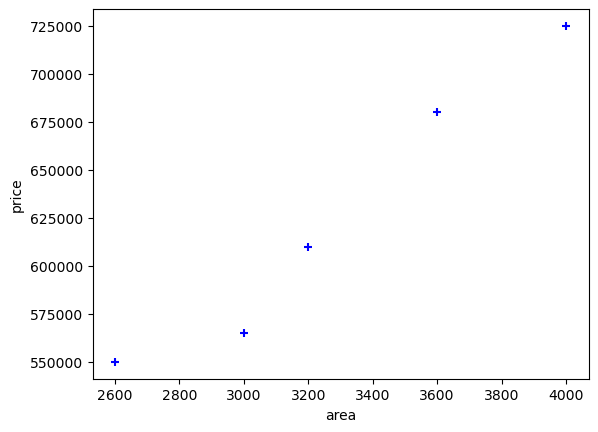

In [3]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color = 'blue', marker = '+')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)
reg.coef_

array([135.78767123])

In [5]:
reg.intercept_

180616.43835616432

In [6]:
reg.predict([[3500]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([655873.28767123])

In [7]:
#Linear regression using multiple variable
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv("homeprices_multiple.csv")

In [8]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [9]:
median = df.bedrooms.median()
median

4.0

In [10]:
df.bedrooms = df.bedrooms.fillna(median)

In [11]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [12]:
x = df.iloc[:, [0,1,2]].values
y = df.iloc[:, 3].values
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [13]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [14]:
reg.intercept_

221323.0018654043

In [15]:
reg.predict([[2600, 3, 30]])

array([485900.45388978])

In [17]:
#Logistic Regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [18]:
x = df.iloc[:,[0]].values
y = df.iloc[:,1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.75)
x_test

array([[18],
       [46],
       [50],
       [21],
       [25],
       [28],
       [26]], dtype=int64)

In [19]:
y_test

array([0, 1, 1, 0, 0, 0, 0], dtype=int64)

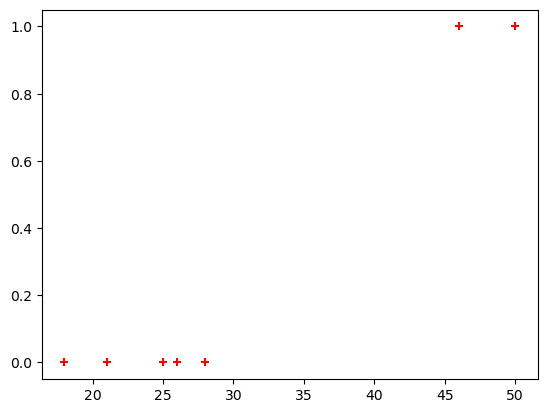

In [20]:
plt.scatter(x_test, y_test, marker = "+", color = "red")

In [21]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

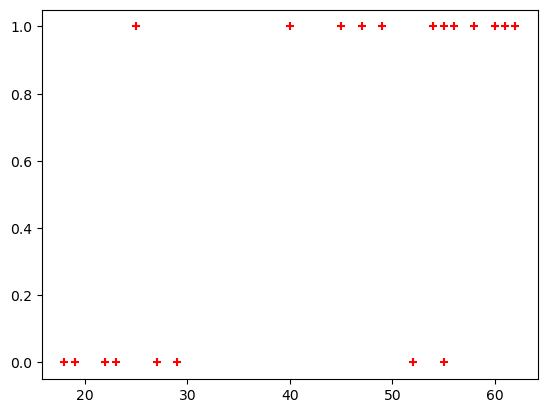

In [22]:
plt.scatter(x_train, y_train, marker = "+", color = "red")

In [23]:
y_predicted = model.predict(x_test)
y_predicted

array([0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [24]:
model.predict_proba(x_test)

array([[0.89200838, 0.10799162],
       [0.28937939, 0.71062061],
       [0.20942834, 0.79057166],
       [0.85679739, 0.14320261],
       [0.79559166, 0.20440834],
       [0.7381713 , 0.2618287 ],
       [0.7775547 , 0.2224453 ]])

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

